<ipython-input-1-035fcad5590c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_bins, y='Monthly_Transactions', data=data, palette="Blues")
<ipython-input-1-035fcad5590c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cashback_Used', y='Retention', data=retention_cashback, palette="Greens")
<ipython-input-1-035fcad5590c>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Preferred_Service', order=data['Preferred_Service'].value_counts().index, palette="Purples_r")
<ipython-input-1-035fcad5590c>:53: FutureWarning: 

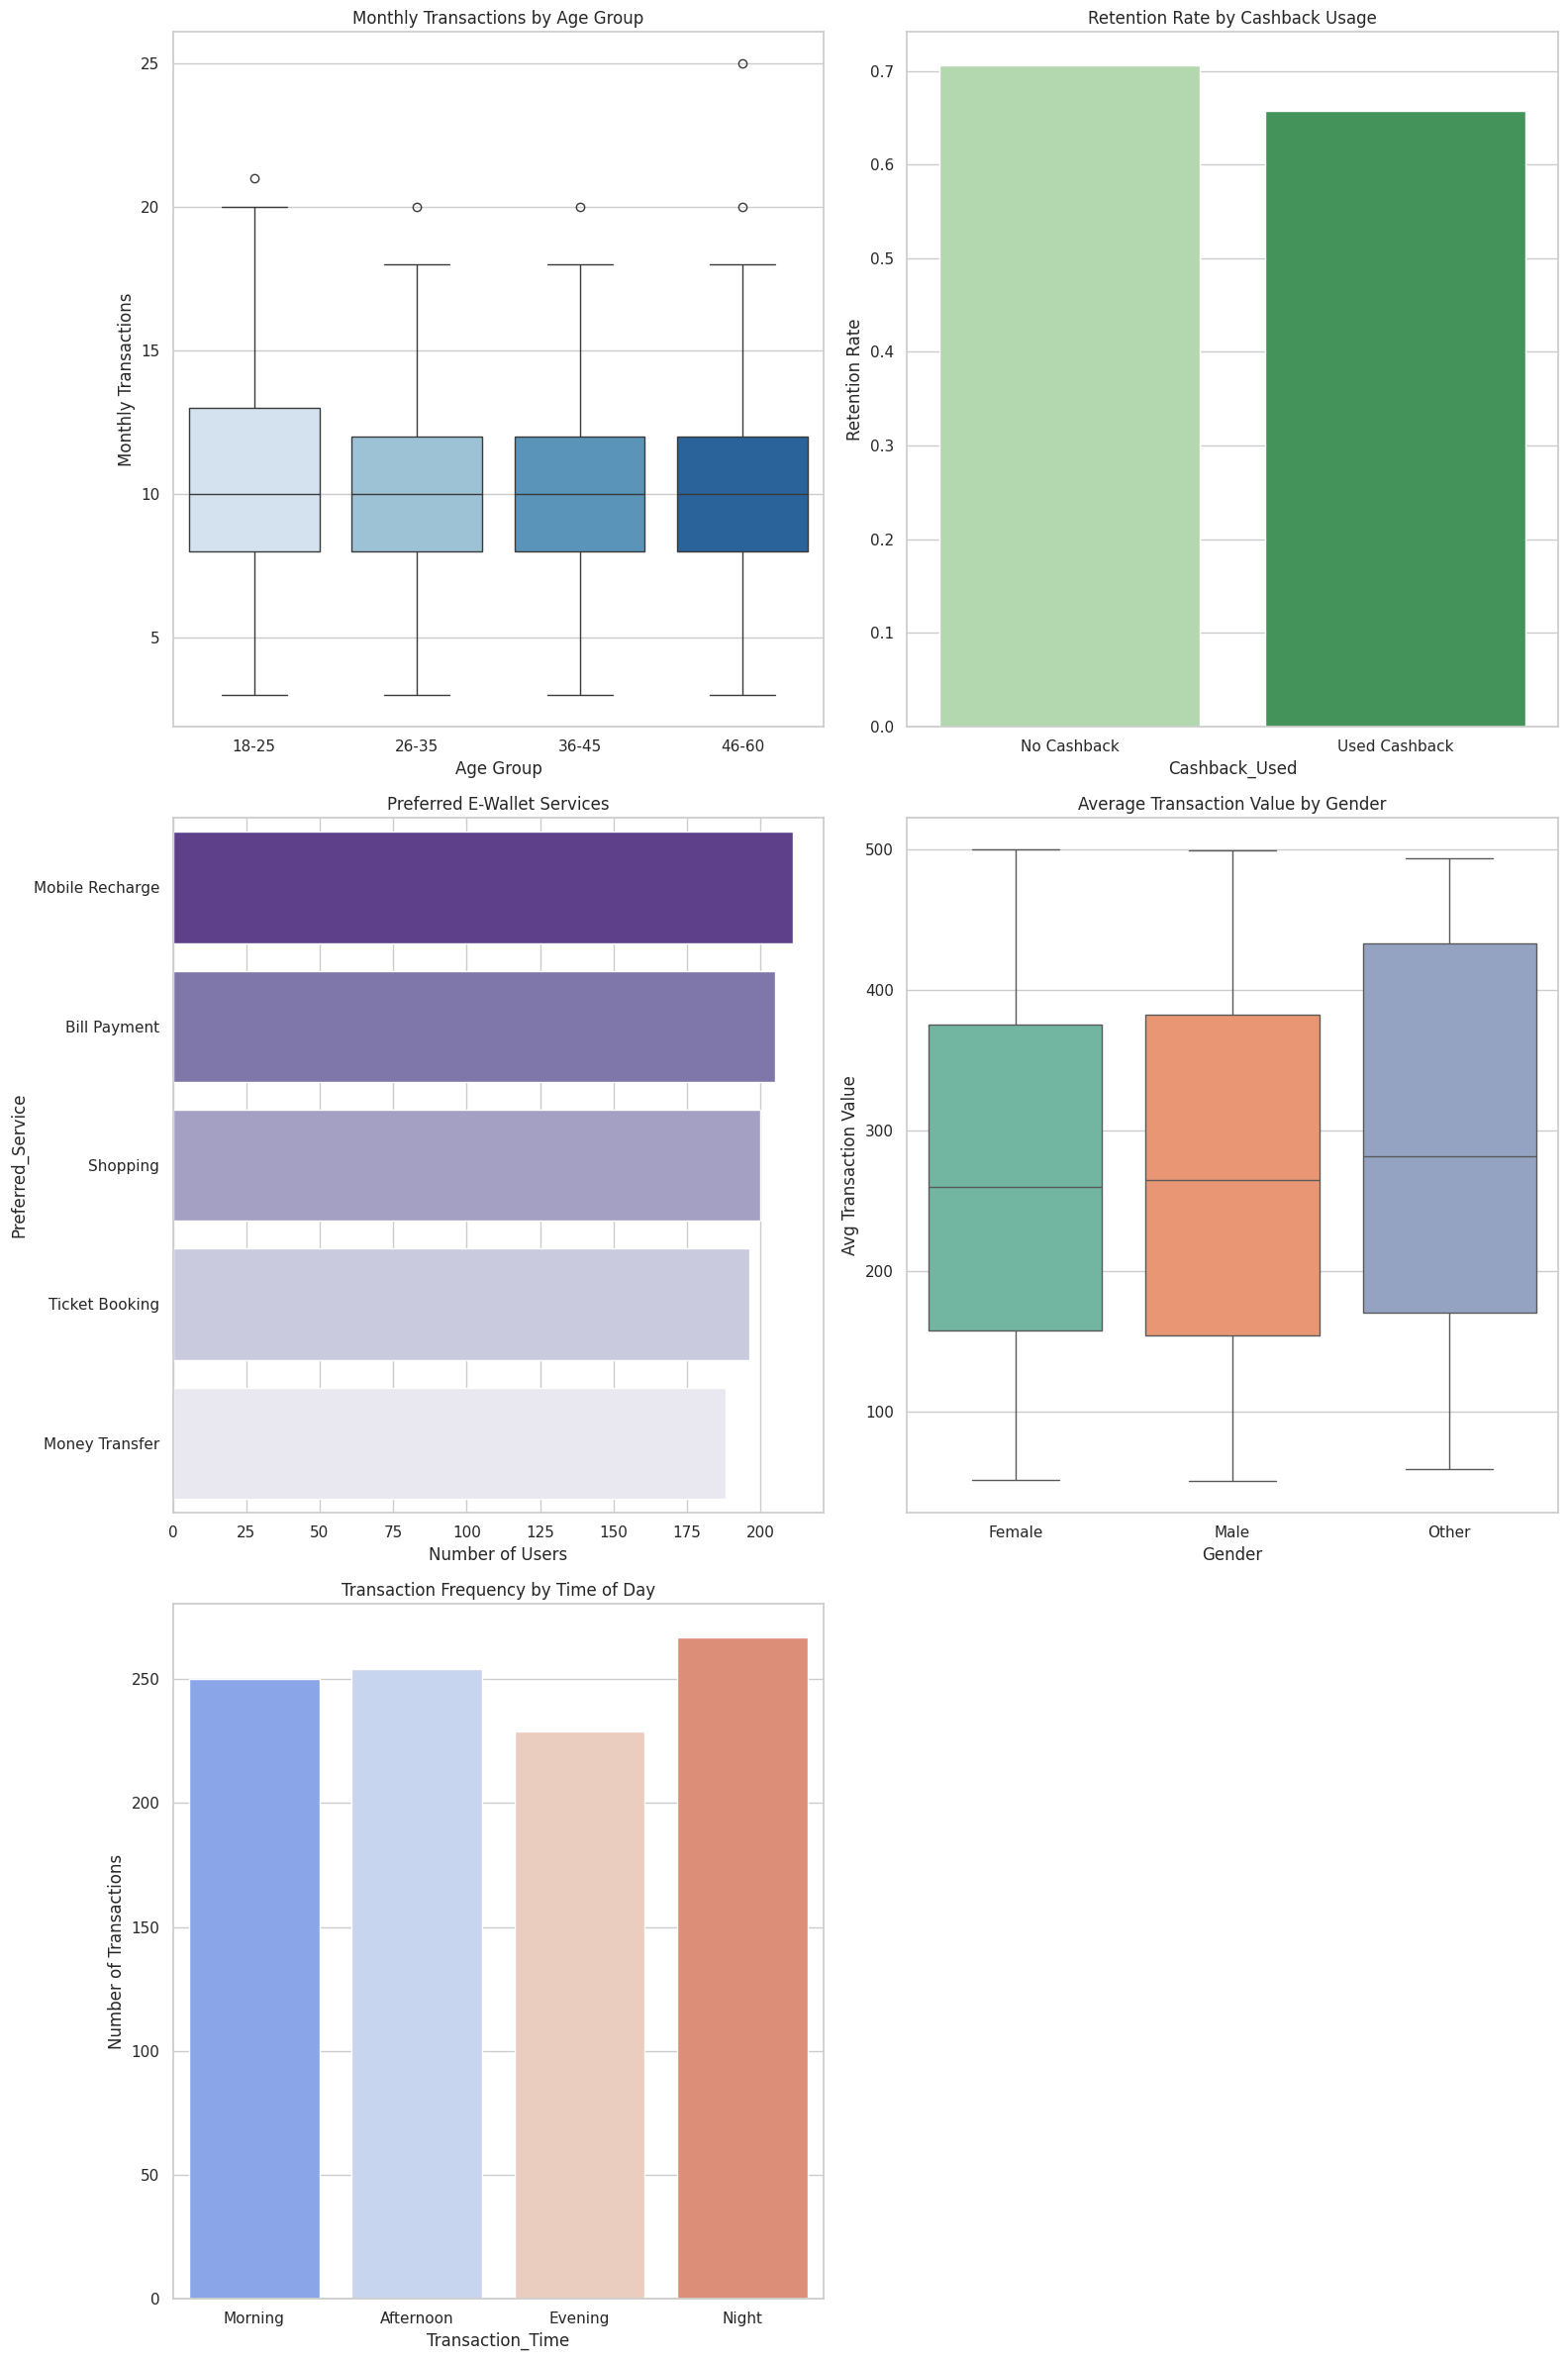

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Create Synthetic Dataset
np.random.seed(42)
n_users = 1000

data = pd.DataFrame({
    'User_ID': np.arange(1, n_users + 1),
    'Age': np.random.choice(range(18, 60), n_users),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n_users, p=[0.48, 0.48, 0.04]),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n_users),
    'Monthly_Transactions': np.random.poisson(lam=10, size=n_users),
    'Avg_Transaction_Value': np.round(np.random.uniform(50, 500, n_users), 2),
    'Preferred_Service': np.random.choice(['Bill Payment', 'Mobile Recharge', 'Shopping', 'Ticket Booking', 'Money Transfer'], n_users),
    'Retention': np.random.choice([1, 0], n_users, p=[0.7, 0.3]),
    'Cashback_Used': np.random.choice([1, 0], n_users, p=[0.6, 0.4]),
    'Transaction_Time': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_users)
})

# 2. Create Visualizations
plt.figure(figsize=(16, 24))

# Distribution of Monthly Transactions by Age Group
plt.subplot(3, 2, 1)
age_bins = pd.cut(data['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])
sns.boxplot(x=age_bins, y='Monthly_Transactions', data=data, palette="Blues")
plt.title("Monthly Transactions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Monthly Transactions")

# Retention Rate by Cashback Usage
plt.subplot(3, 2, 2)
retention_cashback = data.groupby('Cashback_Used')['Retention'].mean().reset_index()
sns.barplot(x='Cashback_Used', y='Retention', data=retention_cashback, palette="Greens")
plt.xticks([0, 1], ['No Cashback', 'Used Cashback'])
plt.title("Retention Rate by Cashback Usage")
plt.ylabel("Retention Rate")

# Preferred Service Count
plt.subplot(3, 2, 3)
sns.countplot(data=data, y='Preferred_Service', order=data['Preferred_Service'].value_counts().index, palette="Purples_r")
plt.title("Preferred E-Wallet Services")
plt.xlabel("Number of Users")

# Avg Transaction Value by Gender
plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='Gender', y='Avg_Transaction_Value', palette="Set2")
plt.title("Average Transaction Value by Gender")
plt.ylabel("Avg Transaction Value")

# Transaction Count by Time of Day
plt.subplot(3, 2, 5)
sns.countplot(data=data, x='Transaction_Time', order=['Morning', 'Afternoon', 'Evening', 'Night'], palette="coolwarm")
plt.title("Transaction Frequency by Time of Day")
plt.ylabel("Number of Transactions")

plt.tight_layout()
plt.show()